<a href="https://colab.research.google.com/github/NagaNehaSri/Heart_Attack_Prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.optimize as opt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

In [ ]:
chd_data = pd.read_csv('HeartAttackdata.csv')

In [ ]:
chd_data.dropna(axis=0, inplace=True)
print(chd_data.head(), chd_data.shape)
print(chd_data.HeartDisease.value_counts())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0   (918, 12)
1    508
0    410
Name: HeartDisease, dtype: int64


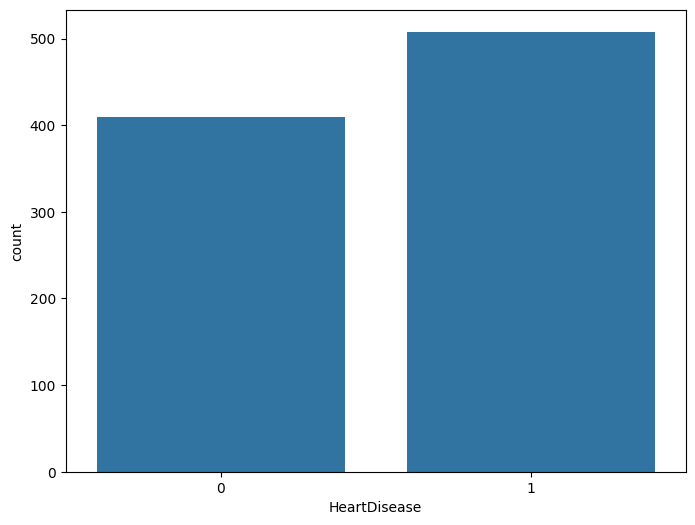

In [ ]:
plt.figure(figsize=(8, 6))
sn.countplot(x="HeartDisease", data=chd_data)
plt.show()

In [ ]:
# Train and test sets
# Declaration of x and y variables (axis)
x = np.asarray(chd_data[['Age','RestingBP', 'Cholesterol','MaxHR']])
y = np.asarray(chd_data['HeartDisease'])

In [ ]:
# Normalize the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (642, 4) (642,)
Test set:  (276, 4) (276,)


In [ ]:
# Modeling the dataset
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
# Evaluation and accuracy
print('')
print('Accuracy of the model in Jaccard score is : ',
      jaccard_score(y_test, y_pred))


Accuracy of the model in Jaccard score is :  0.612565445026178


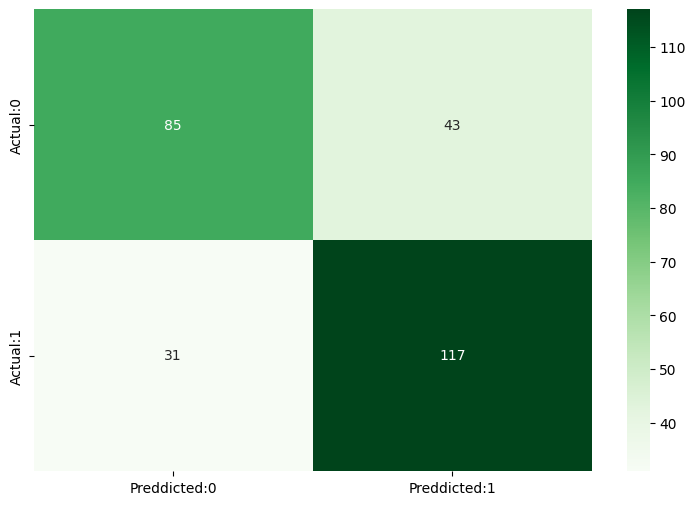

The details for confusion matrix is : 
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       128
           1       0.73      0.79      0.76       148

    accuracy                           0.73       276
   macro avg       0.73      0.73      0.73       276
weighted avg       0.73      0.73      0.73       276



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_setup = pd.DataFrame(data=cm, columns=[
                        'Preddicted:0', 'Preddicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(9, 6))
sn.heatmap(cm_setup, annot=True, fmt='d', cmap="Greens")
plt.show()

print('The details for confusion matrix is : ')
print(classification_report(y_test, y_pred))